In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.utils import plot_model

from IPython.display import display, Image

In [2]:
# Функция для визуализации архитектуры сети

i = 0 # Счётчик для кол-ва изображенных моделей

def plot(model):
    global i
    
    # Загрузка изображения в файл
    plot_model(model, to_file='model_{0}.png'.format(i))
    
    image = Image('model_{0}.png'.format(i))
    
    i += 1 # Инкремент счётчика
    
    # Вывод изображения
    display(image)

Instructions for updating:
Colocations handled automatically by placer.


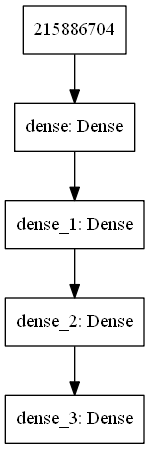

In [3]:
# Последовательная модель с использованием
# конструктора класса Sequential

input_layer = Dense(10, input_shape=(1000, ), activation='relu')

hidden_1 = Dense(10, activation='relu')
hidden_2 = Dense(15, activation='relu')

output_layer = Dense(1, activation='sigmoid')

model = Sequential([input_layer, hidden_1, hidden_2, output_layer])

plot(model)

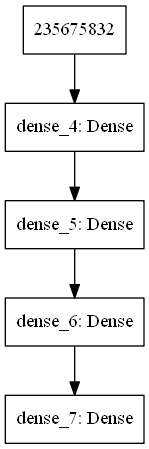

In [4]:
# Построение модели с помощью метода .add()

input_layer = Dense(10, input_shape=(1000, ), activation='relu')

hidden_1 = Dense(10, activation='relu')
hidden_2 = Dense(15, activation='relu')

output_layer = Dense(1, activation='sigmoid')

model = Sequential()
model.add(input_layer)
model.add(hidden_1)
model.add(hidden_2)
model.add(output_layer)

plot(model)

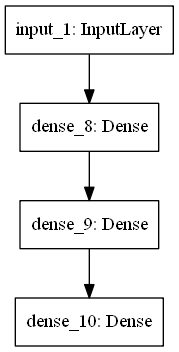

In [5]:
# Последовательная модель с использованием 
# функционального API

input_layer = Input(shape=(1000, ))

# Аналог layer.__call__(previous_layer)
hidden_1 = Dense(16, activation='relu')(input_layer) 
hidden_2 = Dense(16, activation='relu')(hidden_1)

output_layer = Dense(1, activation='sigmoid')(hidden_2)

# Создание модели на основе входных и выходных слоёв
model = Model(inputs=input_layer, outputs=output_layer)

plot(model)

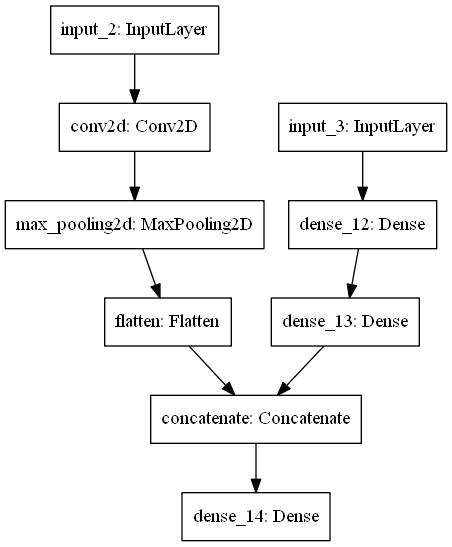

In [6]:
# Модель с двумя input'ами

input_1 = Input(shape=(28, 28, 3))
input_2 = Input(shape=(1000, ))

# Левая ветка
conv_1 = Conv2D(32, kernel_size=4, activation='relu')(input_1)
max_pool_1 = MaxPooling2D(pool_size=(4, 4))(conv_1)
flatten = Flatten()(max_pool_1)
dense_0 = Dense(16, activation='relu')(flatten)

# Правая ветка
dense_1 = Dense(32, activation='relu')(input_2)
dense_2 = Dense(16, activation='relu')(dense_1)

# Соединение
concatenate = Concatenate(axis=1)([flatten, dense_2])

# Выход
output = Dense(1, activation='sigmoid')(concatenate)

model = Model(inputs=[input_1, input_2], outputs=output)

plot(model)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


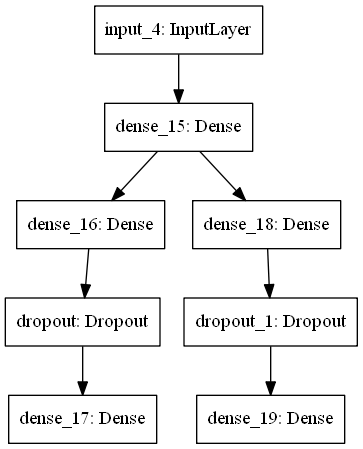

In [7]:
# Модель с одним входом и двумя выходами

input_layer = Input(shape=(1000, ))

dense_1 = Dense(32, activation='relu')(input_layer)

# Левая ветка
dense_1_1 = Dense(16, activation='relu')(dense_1)
dropout_1 = Dropout(0.4)(dense_1_1)
output_1 = Dense(1, activation='sigmoid')(dropout_1)

# Правая ветка
dense_2_1 = Dense(16, activation='relu')(dense_1)
dropout_2 = Dropout(0.2)(dense_2_1)
output_2 = Dense(1, activation='sigmoid')(dropout_2)

# Создание модели
model = Model(inputs=input_layer, outputs=[output_1, output_2])

plot(model)

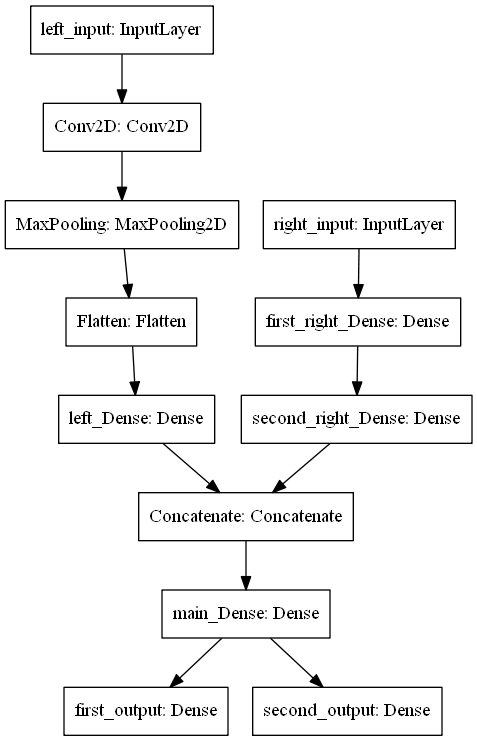

In [8]:
# Создание модели с двумя входами и двумя выходами
# с именованными слоями

input_layer_1 = Input(shape=(1000, ), name='right_input')
input_layer_2 = Input(shape=(28, 28, 3), name='left_input')

# правая ветка
dense_1_1 = Dense(32, 
                  activation='relu', 
                  name='first_right_Dense')(input_layer_1)
dense_1_2 = Dense(16, 
                  activation='relu', 
                  name='second_right_Dense')(dense_1_1)

# левая ветка
conv2d = Conv2D(32, 
                kernel_size=4, 
                activation='relu', 
                name='Conv2D')(input_layer_2)
max_pool = MaxPooling2D(pool_size=(3, 3),
                        name='MaxPooling')(conv2d)
flatten = Flatten(name='Flatten')(max_pool)
dense_2_1 = Dense(16,
                  activation='relu',
                  name='left_Dense')(flatten)

# Соединение
concatenate = Concatenate(axis=1, name='Concatenate')([dense_1_2, dense_2_1])

main_dense = Dense(32, 
                   activation='relu',
                   name='main_Dense')(concatenate)

output_1 = Dense(1, 
                 activation='sigmoid',
                 name='first_output')(main_dense)

output_2 = Dense(1, 
                 activation='sigmoid',
                 name='second_output')(main_dense)

model = Model(inputs=[input_layer_1, input_layer_2],
              outputs=[output_1, output_2])

plot(model)